# German Credit Risk Prediction

<img src="images.jpg" height=100px width=500px></img>

# Introduction

The dataset contains 1000 entries with 11 categorial/symbolic attributes. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

# Data set features 

1.Age (numeric)
2.Sex (text: male, female)
3.Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4.Housing (text: own, rent, or free)
5.Saving accounts (text - little, moderate, quite rich, rich)
6.Checking account (numeric, in DM - Deutsch Mark)
7.Credit amount (numeric, in DM)
8.Duration (numeric, in month)
9.Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Obtain Data

### Importing the basic required libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib','inline')
import missingno as ms
%matplotlib inline

Reading the data from CSV file

In [0]:
data=pd.read_csv('germancreditdata.csv')

# Analyze Data

Obtaining a glimpse of data

In [0]:
data.head(3)

,Customer id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [0]:
data.tail(3)

,Customer id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [0]:
type(data)

pandas.core.frame.DataFrame

In [0]:
data.shape

(1000, 11)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Customer id         1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [0]:
data.describe()

,Customer id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Visualization of the data

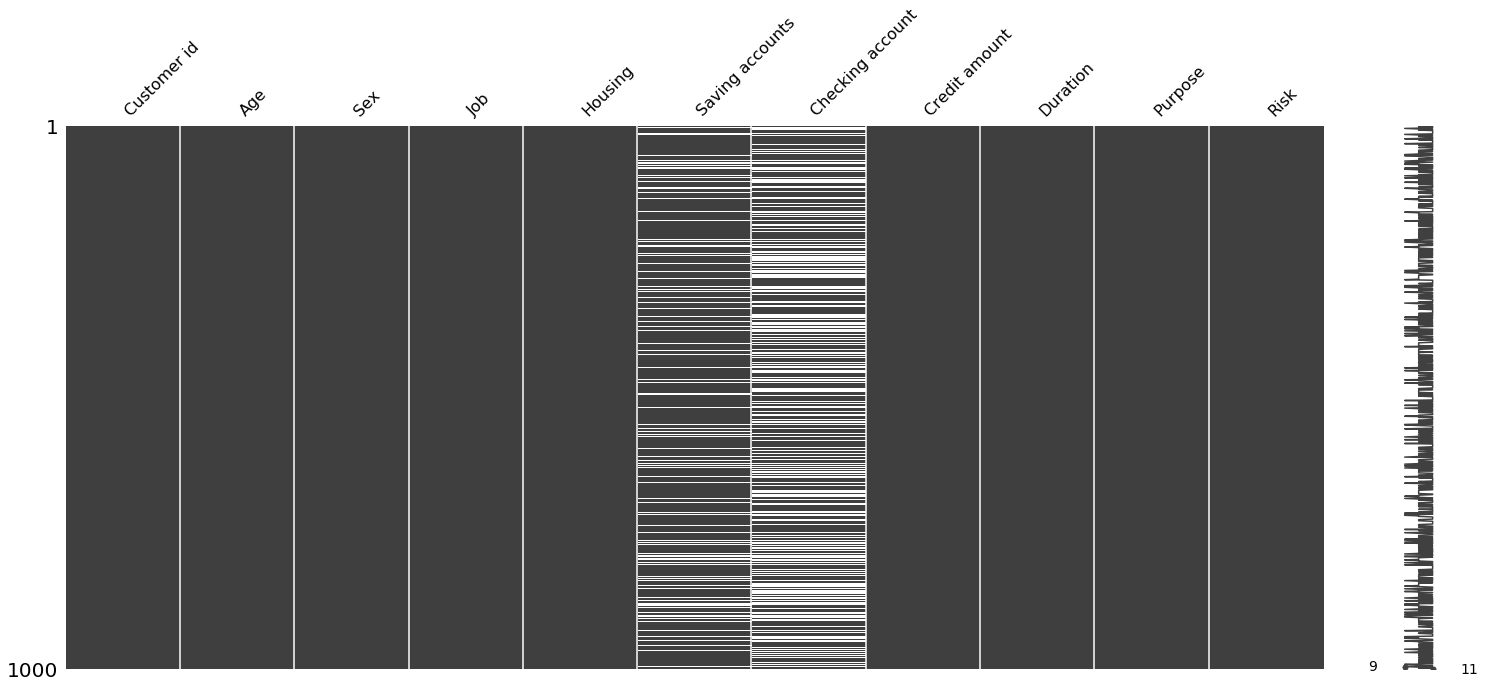

In [0]:
ms.matrix(data)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Customer id         1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


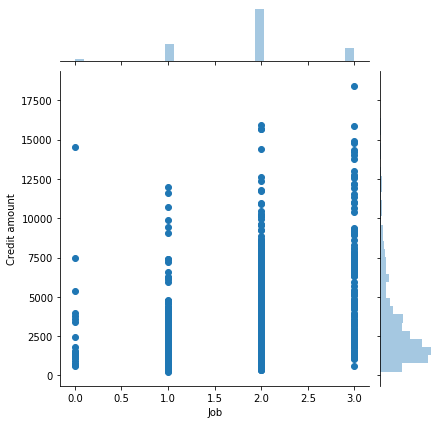

In [0]:
sns.jointplot(x='Job',y='Credit amount',data=data)

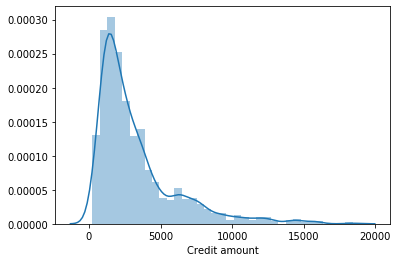

In [0]:
sns.distplot(data['Credit amount'])

In [0]:
data.corr()

,Customer id,Age,Job,Credit amount,Duration
Customer id,1.000000,-0.010096,-0.027345,0.013488,0.030788
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136
Job,-0.027345,0.015673,1.000000,0.285385,0.210910
Credit amount,0.013488,0.032716,0.285385,1.000000,0.624984
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000


Text(0.5, 1, 'data.corr()')

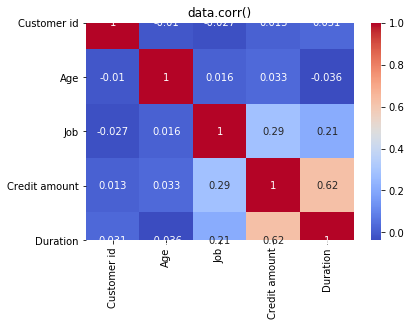

In [0]:
sns.heatmap(data.corr(),cmap='coolwarm',xticklabels=True,annot=True)
plt.title('data.corr()')

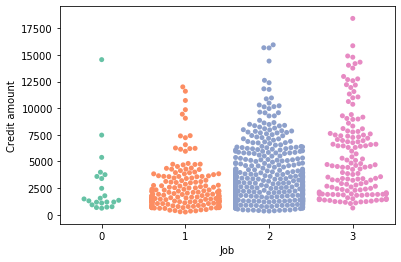

In [0]:
sns.swarmplot(x='Job',y='Credit amount',data=data,palette='Set2')

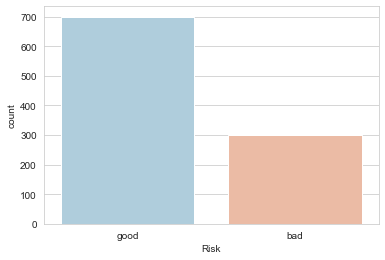

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',data=data,palette='RdBu_r')

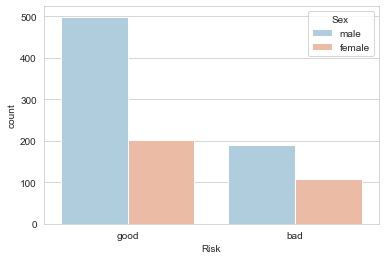

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Sex',data=data,palette='RdBu_r')

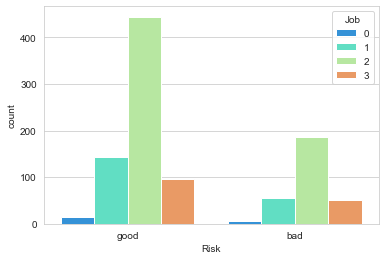

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Job',data=data,palette='rainbow')

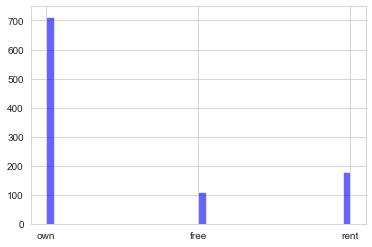

In [0]:
data['Housing'].hist(bins=40,color='blue',alpha=0.6)

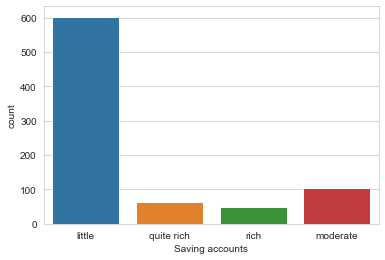

In [0]:
sns.countplot(x='Saving accounts',data=data)

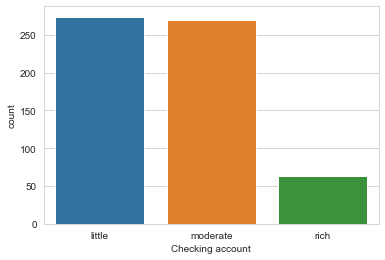

In [0]:
sns.countplot(x='Checking account',data=data)

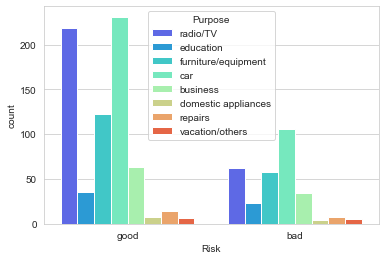

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',hue='Purpose',data=data,palette='rainbow')

# Feature Engineering

Fill the missing values in the obtained data

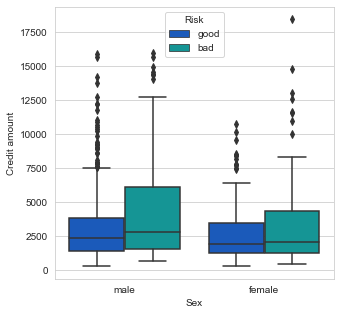

In [0]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex',y='Credit amount',data=data,palette='winter',hue='Risk')

In [0]:
data['Saving accounts'].mode()

0    little
dtype: object

The most frequently occured type of Saving accounts is replaced with missing value of Saving accounts column

In [0]:
def impute_savings(cols):
    Savingaccounts=cols[0]
    x="little"
    if pd.isnull(Savingaccounts):
        return x
    else:
        return Savingaccounts
        

In [0]:
data['Saving accounts']=data[['Saving accounts']].apply(impute_savings,axis=1)

In [0]:
data['Checking account'].mode()

0    little
dtype: object

The most frequently occured type of Checking account is replaced with missing value of Checking account column

In [0]:
def impute_checking(cols):
    Checkingaccount=cols[0]
    y="little"
    if pd.isnull(Checkingaccount):
        return y
    else:
        return Checkingaccount
 

In [0]:
data['Checking account']=data[['Checking account']].apply(impute_checking,axis=1)

In [0]:
data.head(15)

,Customer id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,little,little,9055,36,education,good
6,6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,little,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


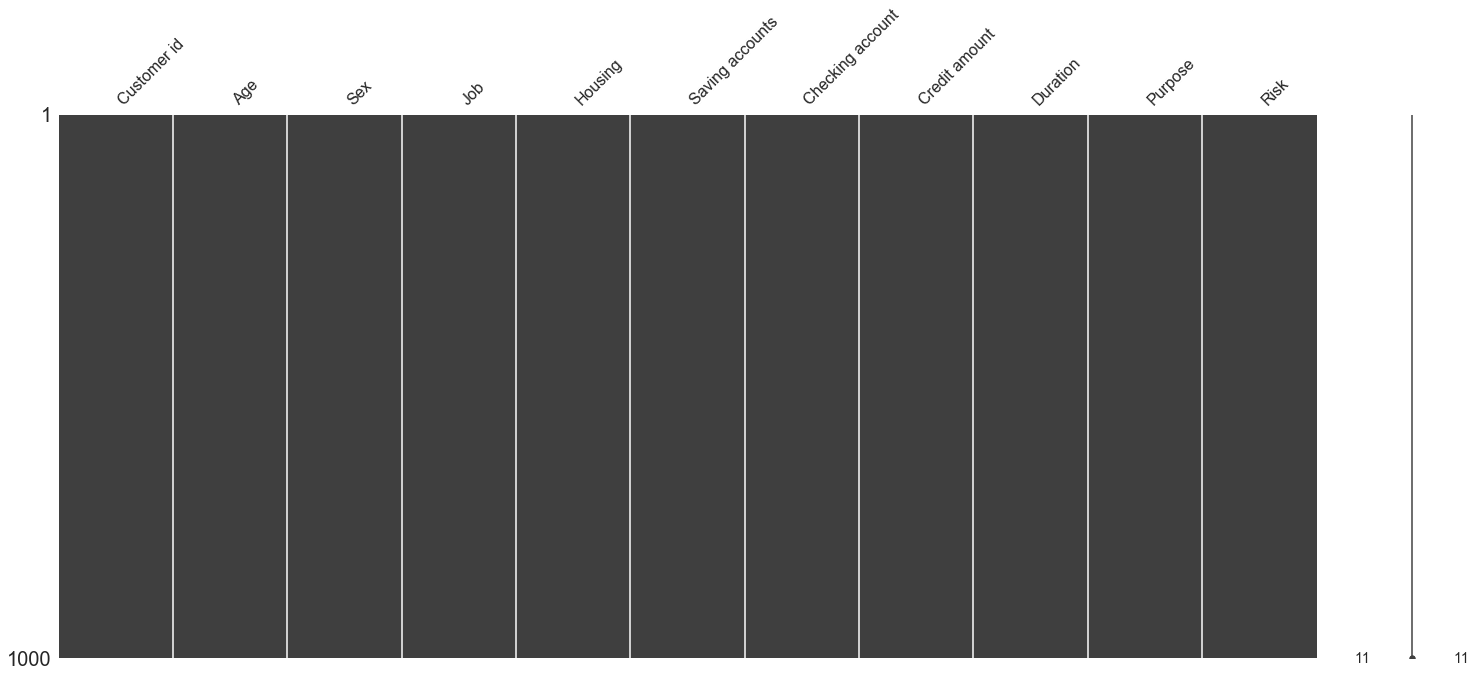

In [0]:
ms.matrix(data)

## Categorical value Conversion

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Customer id         1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [0]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [0]:
data['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [0]:
data['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [0]:
data['Housing'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [0]:
713+179+108

1000

In [0]:
Sex_df=pd.get_dummies(data['Sex'],drop_first=True)
Sex_df.head()

,male
0,1
1,0
2,1
3,1
4,1


In [0]:
Housing_df=pd.get_dummies(data['Housing'],drop_first=True)
Housing_df.head()

,own,rent
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


In [0]:
Savings_df=pd.get_dummies(data['Saving accounts'],drop_first=True)
Savings_df.head()

,moderate,quite rich,rich
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [0]:
purpose_df=pd.get_dummies(data['Purpose'],drop_first=True)
purpose_df.head()

,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [0]:
Checking_df = pd.get_dummies(data['Checking account'],drop_first=True)
Checking_df.head()

,moderate,rich
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [0]:
Risk_df = pd.get_dummies(data['Risk'],drop_first=True)
Risk_df.head()

,good
0,1
1,0
2,1
3,1
4,0


In [0]:
old_data = data.copy()
data.drop(['Sex','Housing','Saving accounts','Checking account','Purpose','Risk'],axis=1,inplace=True)
data.head()

,Customer id,Age,Job,Credit amount,Duration
0,0,67,2,1169,6
1,1,22,2,5951,48
2,2,49,1,2096,12
3,3,45,2,7882,42
4,4,53,2,4870,24


In [0]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Customer id         1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [0]:
data = pd.concat([data,purpose_df,Sex_df,Housing_df,Savings_df,Checking_df,Risk_df],axis=1)

In [0]:
data.head()

,Customer id,Age,Job,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,...,vacation/others,male,own,rent,moderate,quite rich,rich,moderate,rich,good
0,0,67,2,1169,6,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
1,1,22,2,5951,48,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,2,49,1,2096,12,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
3,3,45,2,7882,42,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,4,53,2,4870,24,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [0]:
data.head()

,Customer id,Age,Job,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,...,vacation/others,male,own,rent,moderate,quite rich,rich,moderate,rich,good
0,0,67,2,1169,6,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
1,1,22,2,5951,48,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,2,49,1,2096,12,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
3,3,45,2,7882,42,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,4,53,2,4870,24,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [0]:
data.describe()

,Customer id,Age,Job,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,...,vacation/others,male,own,rent,moderate,quite rich,rich,moderate,rich,good
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000,0.337000,0.01200,0.059000,0.181000,0.280000,...,0.01200,0.690000,0.713000,0.179000,0.103000,0.063000,0.048000,0.269000,0.063000,0.700000
std,288.819436,11.375469,0.653614,2822.736876,12.058814,0.472921,0.10894,0.235743,0.385211,0.449224,...,0.10894,0.462725,0.452588,0.383544,0.304111,0.243085,0.213873,0.443662,0.243085,0.458487
min,0.000000,19.000000,0.000000,250.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000,1.000000,0.00000,0.000000,0.000000,1.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Selection

### Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('good',axis=1), 
                                                    data['good'],test_size=0.25, 
                                                    random_state=100)

# Logistic Regression


### Training the model

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 786 to 520
Data columns (total 20 columns):
Customer id            750 non-null int64
Age                    750 non-null int64
Job                    750 non-null int64
Credit amount          750 non-null int64
Duration               750 non-null int64
car                    750 non-null uint8
domestic appliances    750 non-null uint8
education              750 non-null uint8
furniture/equipment    750 non-null uint8
radio/TV               750 non-null uint8
repairs                750 non-null uint8
vacation/others        750 non-null uint8
male                   750 non-null uint8
own                    750 non-null uint8
rent                   750 non-null uint8
moderate               750 non-null uint8
quite rich             750 non-null uint8
rich                   750 non-null uint8
moderate               750 non-null uint8
rich                   750 non-null uint8
dtypes: int64(5), uint8(15)
memory usage: 46.1 KB


In [0]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\windows\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the model on the test set

In [0]:
predicted=logmodel.predict(X_test)

In [0]:
predicted


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

# Tune the Model

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

### Confusion Matrix

In [0]:
print(confusion_matrix(y_test, predicted))

[[ 10  61]
 [ 16 163]]


### Precision Score

In [0]:
from sklearn.metrics import precision_score
print(precision_score(y_test,predicted))

0.7276785714285714


### Recall Score

In [0]:
from sklearn.metrics import recall_score

print(recall_score(y_test,predicted))

0.9106145251396648


### f1_score

In [0]:
from sklearn.metrics import f1_score

print(f1_score(y_test,predicted))

0.8089330024813896


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.38      0.14      0.21        71
           1       0.73      0.91      0.81       179

    accuracy                           0.69       250
   macro avg       0.56      0.53      0.51       250
weighted avg       0.63      0.69      0.64       250



## Predicting on New Class

In [0]:
sample_data=pd.read_csv('samplegermancreditdata.csv')

In [0]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Customer id         1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [0]:
sample_data.head()

,Customer id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


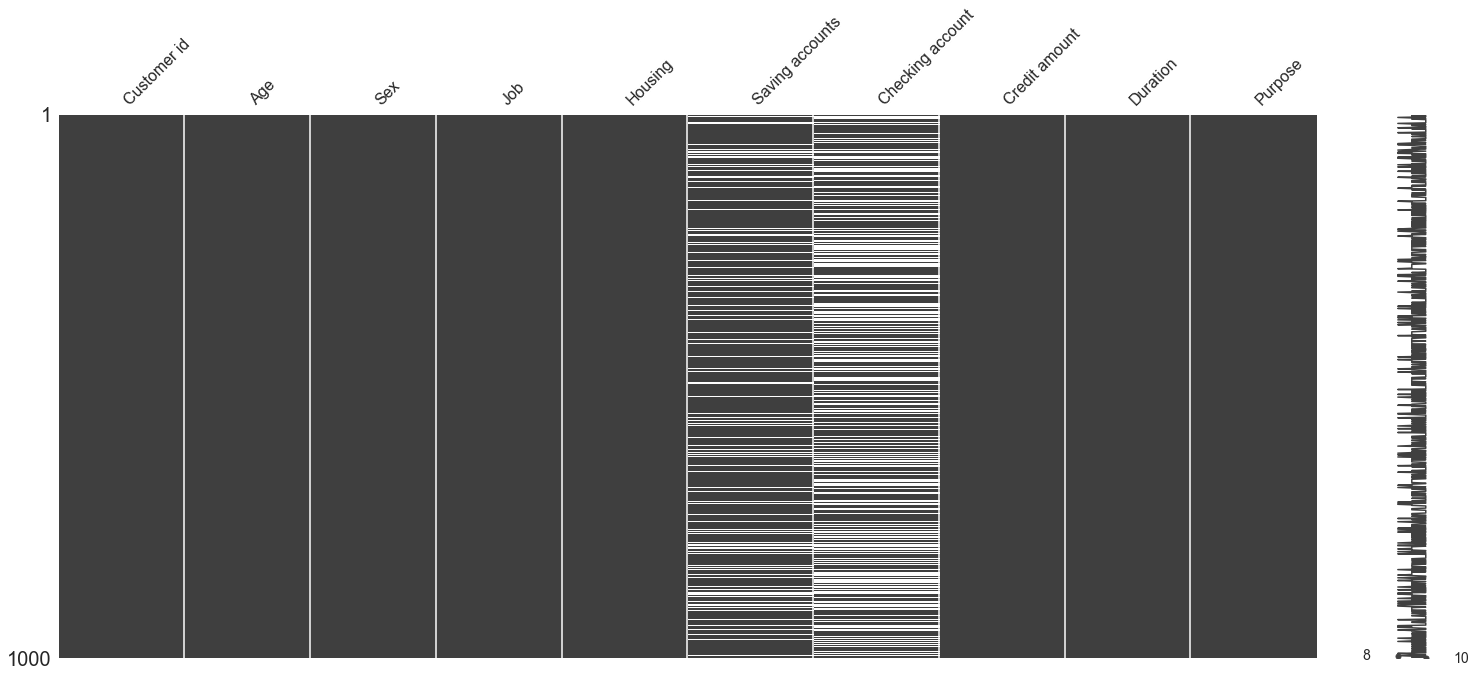

In [0]:
ms.matrix(sample_data)

### Data Cleaning

In [0]:
sample_data['Saving accounts']=sample_data[['Saving accounts']].apply(impute_savings,axis=1)

In [0]:
sample_data['Checking account']=sample_data[['Checking account']].apply(impute_checking,axis=1)

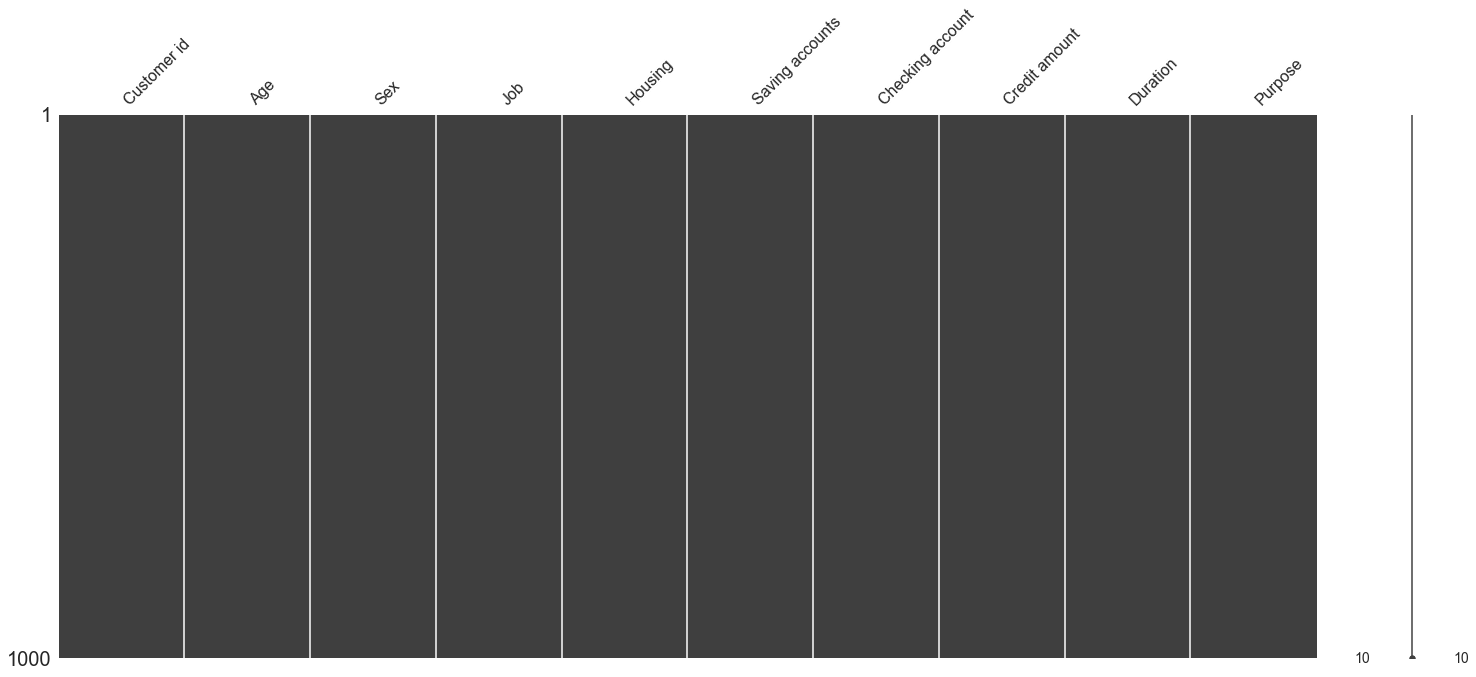

In [0]:
ms.matrix(sample_data)

In [0]:
purpose = pd.get_dummies(sample_data['Purpose'], drop_first=True)
sex = pd.get_dummies(sample_data['Sex'],drop_first=True)
housing = pd.get_dummies(sample_data['Housing'],drop_first=True)
savings = pd.get_dummies(sample_data['Saving accounts'],drop_first=True)
checking = pd.get_dummies(sample_data['Checking account'],drop_first=True)

In [0]:
sample_data.drop(['Purpose','Sex','Housing','Saving accounts','Checking account'],axis=1,inplace=True)

sample_data = pd.concat([sample_data,purpose,sex,housing,savings,checking],axis=1)

sample_data.head()

,Customer id,Age,Job,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,male,own,rent,moderate,quite rich,rich,moderate,rich
0,0,67,2,1169,6,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,22,2,5951,48,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,2,49,1,2096,12,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
3,3,45,2,7882,42,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,4,53,2,4870,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
Customer id            1000 non-null int64
Age                    1000 non-null int64
Job                    1000 non-null int64
Credit amount          1000 non-null int64
Duration               1000 non-null int64
car                    1000 non-null uint8
domestic appliances    1000 non-null uint8
education              1000 non-null uint8
furniture/equipment    1000 non-null uint8
radio/TV               1000 non-null uint8
repairs                1000 non-null uint8
vacation/others        1000 non-null uint8
male                   1000 non-null uint8
own                    1000 non-null uint8
rent                   1000 non-null uint8
moderate               1000 non-null uint8
quite rich             1000 non-null uint8
rich                   1000 non-null uint8
moderate               1000 non-null uint8
rich                   1000 non-null uint8
dtypes: int64(5), uint8(15)
memory

In [0]:
sample_data.head(3)

,Customer id,Age,Job,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,male,own,rent,moderate,quite rich,rich,moderate,rich
0,0,67,2,1169,6,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,22,2,5951,48,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,2,49,1,2096,12,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0


In [0]:
sample_data.head(3)

,Customer id,Age,Job,Credit amount,Duration,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,male,own,rent,moderate,quite rich,rich,moderate,rich
0,0,67,2,1169,6,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,22,2,5951,48,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,2,49,1,2096,12,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0


In [0]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
Customer id            1000 non-null int64
Age                    1000 non-null int64
Job                    1000 non-null int64
Credit amount          1000 non-null int64
Duration               1000 non-null int64
car                    1000 non-null uint8
domestic appliances    1000 non-null uint8
education              1000 non-null uint8
furniture/equipment    1000 non-null uint8
radio/TV               1000 non-null uint8
repairs                1000 non-null uint8
vacation/others        1000 non-null uint8
male                   1000 non-null uint8
own                    1000 non-null uint8
rent                   1000 non-null uint8
moderate               1000 non-null uint8
quite rich             1000 non-null uint8
rich                   1000 non-null uint8
moderate               1000 non-null uint8
rich                   1000 non-null uint8
dtypes: int64(5), uint8(15)
memory

### Predicting on New Dataset

In [0]:
predict1=logmodel.predict(sample_data)
predict1
df1=pd.DataFrame(predict1,columns=['Risk'])
df2=pd.DataFrame(sample_data['Customer id'],columns=['Customer id'])
df2.head()
result = pd.concat([df2,df1],axis=1)
result.head()

,Customer id,Risk
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


### Writing to CSV File

In [0]:

result.to_csv('result.csv',index=False)